In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import pandas as pd

from src.utils.models import BayesKitModel

In [5]:
model_path = "posteriors/funnel10/funnel10.stan"
data_path = None
model = BayesKitModel(model_path, data_path)

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/bridgestan/model.py:137: UserWarning: Loading a shared object /mnt/home/gturok/drghmc/posteriors/funnel10/funnel10_model.so that has already been loaded.
If the file has changed since the last time it was loaded, this load may not update the library!
  warnings.warn(


In [6]:
arr = [ 1772.9358934,   -583.02955796,    75.20735147,    57.2926673912218,   -436.25292564, -1527.18855619,  -722.58832131,  -414.3389387912219,   -280.82826331,  -357.33907943]
x = np.array(arr, dtype=np.float64)
log_density, gradient = model.log_density_gradient(x)

print(f"log_density:\n\t{log_density}", f"gradient:\n\t{gradient}", sep="\n")

ValueError: NaN values in log density or gradient at [ 1772.9358934   -583.02955796    75.20735147    57.29266739
  -436.25292564 -1527.18855619  -722.58832131  -414.33893879
  -280.82826331  -357.33907943]

Text(0.5, 0.98, 'Gradient and Density for 10-Dim Funnel\n')

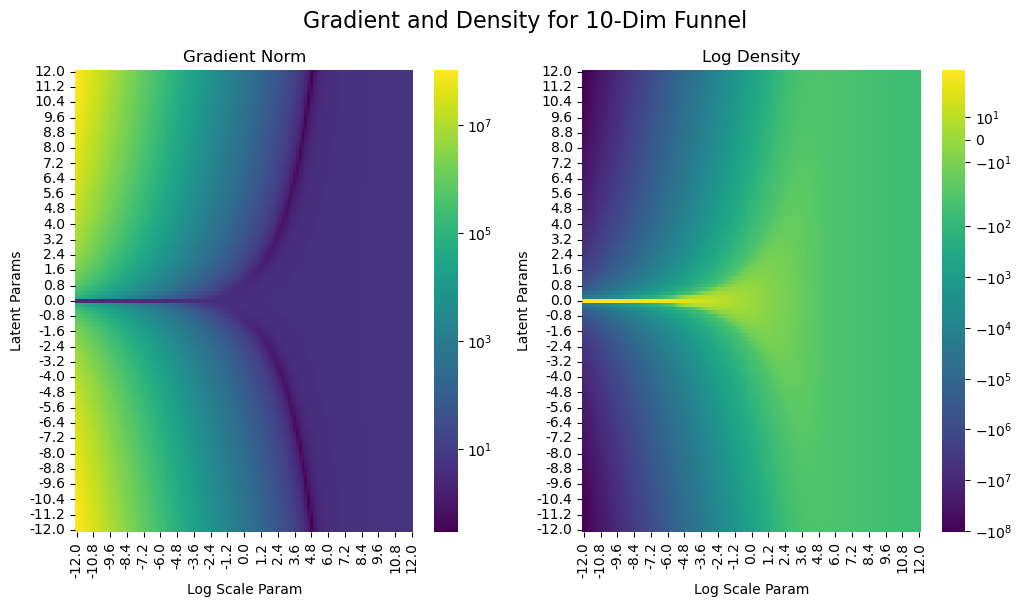

In [248]:
# Generate x values using numpy 10 dimensional linspace
x_values = np.linspace(-12, 12, 121)
y_values = np.linspace(12, -12, 121)
# Create an empty 2D array to store the gradient values
grad_values = np.zeros((len(x_values), len(y_values)))
density_values = np.zeros((len(x_values), len(y_values)))

# Calculate gradient values for each x value
for i, y_val in enumerate(y_values):
    for j, x_val in enumerate(x_values):
        arr = np.array([x_val] +  [y_val] * 9)
        log_density, gradient = model.log_density_gradient(arr)
        
        grad_values[i, j] = np.linalg.norm(gradient)
        density_values[i, j] = log_density


index = np.round(y_values, 1)
columns = np.round(x_values, 1)
grad_data = pd.DataFrame(grad_values, index=index, columns=columns)
density_data = pd.DataFrame(density_values, index=index, columns=columns)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a 2D heatmap using seaborn
sns.heatmap(
    data=grad_data, 
    norm=LogNorm(),
    cmap="viridis",
    ax=axes[0]
)
axes[0].set_ylabel("Latent Params")
axes[0].set_xlabel("Log Scale Param")
axes[0].set_title("Gradient Norm")

sns.heatmap(
    data=density_data,
    # vmin=-100,
    norm=SymLogNorm(linthresh=25),
    #vmax=0.1,
    cmap="viridis",
    ax=axes[1]
)
axes[1].set_ylabel("Latent Params")
axes[1].set_xlabel("Log Scale Param")
axes[1].set_title("Log Density")

fig.suptitle("Gradient and Density for 10-Dim Funnel\n", fontsize=16)


Text(0.5, 0.98, 'Gradient and Density for 10-Dim Funnel\n')

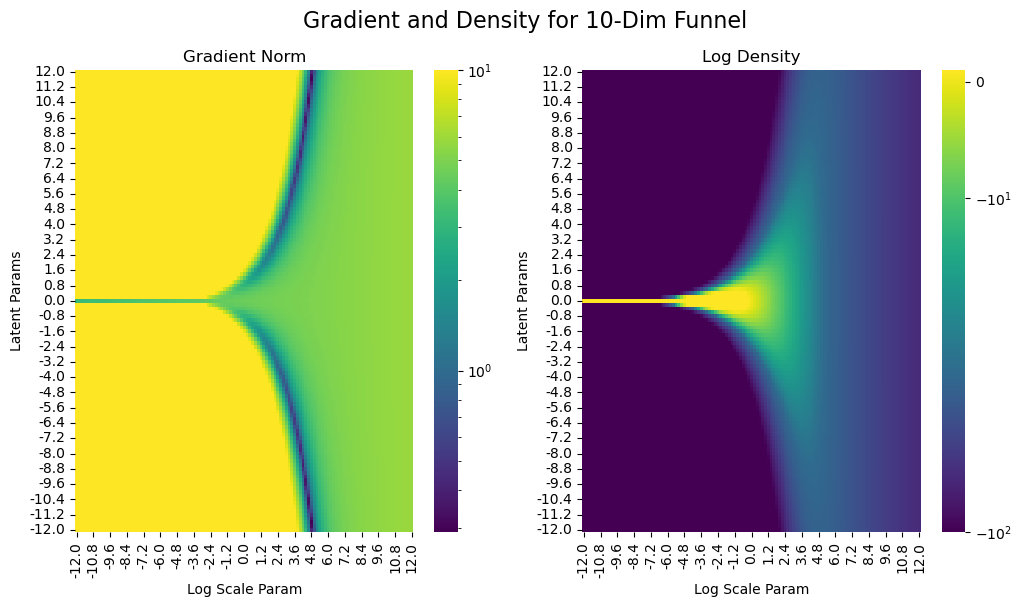

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import pandas as pd

# Generate x values using numpy 10 dimensional linspace
x_values = np.linspace(-12, 12, 121)
y_values = np.linspace(12, -12, 121)
# Create an empty 2D array to store the gradient values
grad_values = np.zeros((len(x_values), len(y_values)))
density_values = np.zeros((len(x_values), len(y_values)))

# Calculate gradient values for each x value
for i, y_val in enumerate(y_values):
    for j, x_val in enumerate(x_values):
        arr = np.array([x_val] +  [y_val] * 9)
        log_density, gradient = model.log_density_gradient(arr)
        
        grad_values[i, j] = np.linalg.norm(gradient)
        density_values[i, j] = log_density


index = np.round(y_values, 1)
columns = np.round(x_values, 1)
grad_data = pd.DataFrame(grad_values, index=index, columns=columns)
density_data = pd.DataFrame(density_values, index=index, columns=columns)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a 2D heatmap using seaborn
sns.heatmap(
    data=grad_data, 
    norm=LogNorm(vmax=10),
    cmap="viridis",
    ax=axes[0]
)
axes[0].set_ylabel("Latent Params")
axes[0].set_xlabel("Log Scale Param")
axes[0].set_title("Gradient Norm")

sns.heatmap(
    data=density_data,
    # vmin=-100,
    norm=SymLogNorm(linthresh=25, vmin=-100, vmax=1),
    #vmax=0.1,
    cmap="viridis",
    ax=axes[1]
)
axes[1].set_ylabel("Latent Params")
axes[1].set_xlabel("Log Scale Param")
axes[1].set_title("Log Density")

fig.suptitle("Gradient and Density for 10-Dim Funnel\n", fontsize=16)


In [203]:
arr = np.array([-10] + [0] * 9, dtype=np.float64)
log_density, gradient = model.log_density_gradient(arr)
log_density

39.44444444444444